In [48]:
import requests
import json as jsn
import pandas as pd
from pandas import json_normalize

url = 'https://webapps.supen.fi.cr/reportesapi/api/Reportes/Portafolio?FechaInicio=2021-01-01&FechaFinal=2021-12-31'
datos = requests.get(url)
if datos.status_code == 200:
    a_json = jsn.loads(datos.content)
    df = pd.DataFrame.from_dict(a_json, orient="columns")
    df.head(5)

In [ ]:
df.head(5)

,fecha,codigoregimen,regimen,codigofondo,fondo,codigoentidad,entidad,codigomoneda,moneda,codigomodalidadinversion,...,codigofondoinversion,fondoinversion,codigoplazo,plazo,codigosector,sector,codigoemisor,emisor,montocolones,montodolares
0,2021-01-31,1,PLANES VOLUNTARIOS,VACC,VOLUNTARIO B EN COLONES,A02,BN-VITAL,1,COLONES,DE,...,-1,NO DISPONIBLE,1,ENTRE 0 Y 180 DIAS,1,PUBLICO,BPDC,BANCO POPULAR DESARROLLO COMUNAL,4.036926e+08,662954.0432
1,2021-01-31,1,PLANES VOLUNTARIOS,VACC,VOLUNTARIO B EN COLONES,A02,BN-VITAL,1,COLONES,DE,...,-1,NO DISPONIBLE,1,ENTRE 0 Y 180 DIAS,2,PRIVADO,BNSCR,THE BANK OF NOVA SCOTIA (COSTA RICA) S.A.,9.998554e+07,164198.7421
2,2021-01-31,1,PLANES VOLUNTARIOS,VACC,VOLUNTARIO B EN COLONES,A02,BN-VITAL,1,COLONES,DE,...,-1,NO DISPONIBLE,1,ENTRE 0 Y 180 DIAS,2,PRIVADO,BPROM,BANCO PROMÉRICA DE COSTA RICA S.A,5.152538e+08,846162.6460
3,2021-01-31,1,PLANES VOLUNTARIOS,VACC,VOLUNTARIO B EN COLONES,A02,BN-VITAL,1,COLONES,DE,...,-1,NO DISPONIBLE,1,ENTRE 0 Y 180 DIAS,2,PRIVADO,BSJ,BANCO BAC SAN JOSE S.A.,5.215264e+07,85646.3552
4,2021-01-31,1,PLANES VOLUNTARIOS,VACC,VOLUNTARIO B EN COLONES,A02,BN-VITAL,1,COLONES,DE,...,-1,NO DISPONIBLE,2,ENTRE 180 Y 360 DÍAS,2,PRIVADO,BPROM,BANCO PROMÉRICA DE COSTA RICA S.A,4.166974e+08,684310.8600


In [ ]:
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

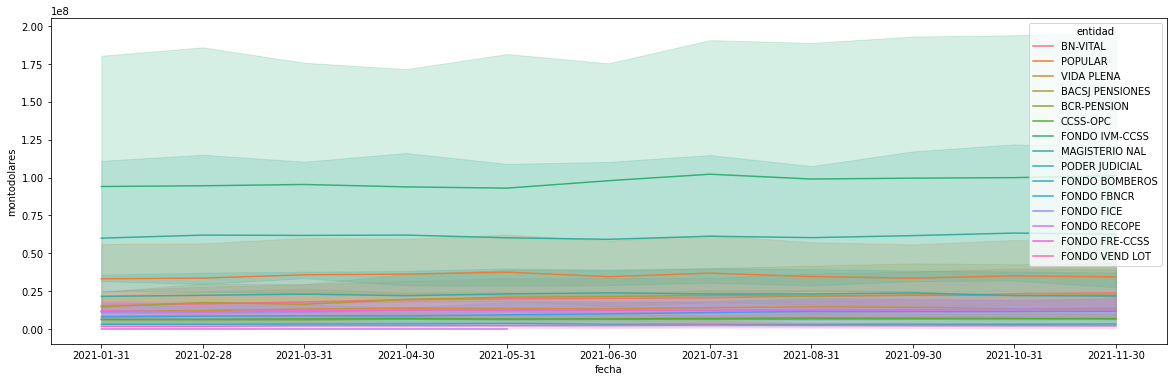

In [ ]:
f, ax = plt.subplots(figsize = (20,6))
sns.lineplot(x="fecha", y="montodolares",
             hue="entidad", 
             data=df)
sns.set_color_codes('pastel')
plt.show()

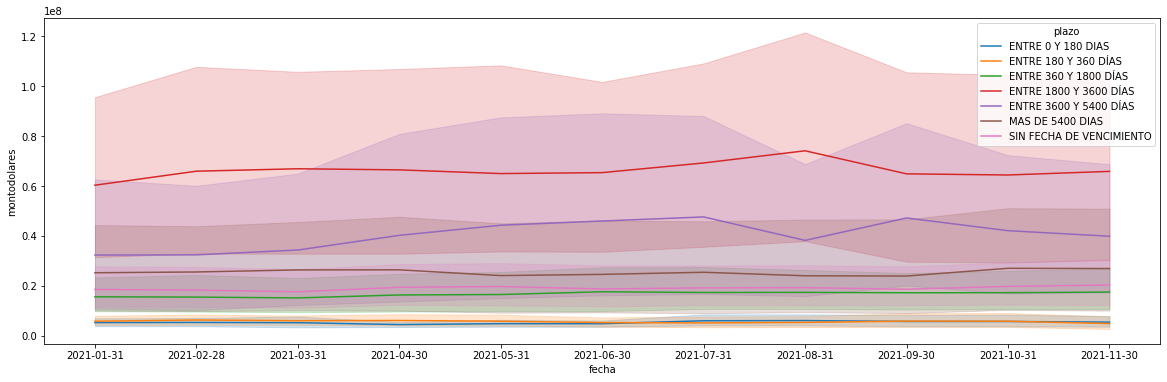

In [ ]:
f, ax = plt.subplots(figsize = (20,6))
sns.lineplot(x="fecha", y="montodolares",
             hue="plazo", 
             data=df)
sns.set_color_codes('pastel')
plt.show()

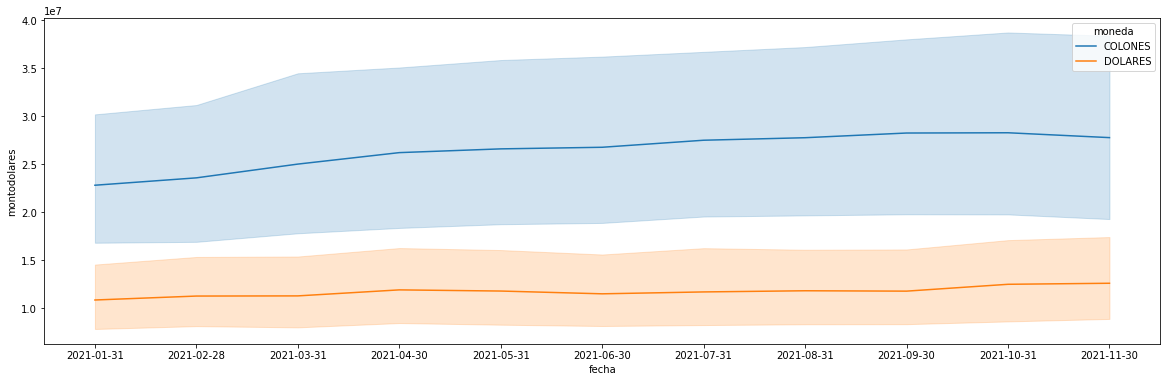

In [ ]:
f, ax = plt.subplots(figsize = (20,6))
sns.lineplot(x="fecha", y="montodolares",
             hue="moneda", 
             data=df)
sns.set_color_codes('pastel')
plt.show()

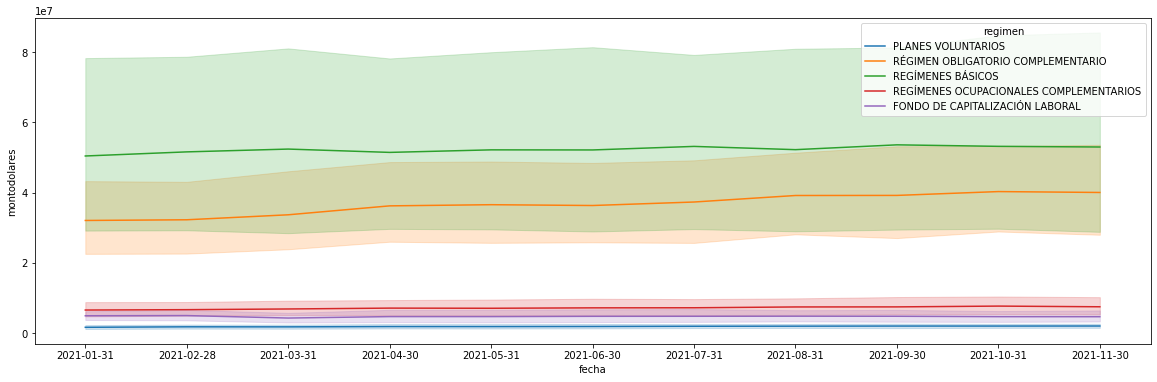

In [ ]:
f, ax = plt.subplots(figsize = (20,6))
sns.lineplot(x="fecha", y="montodolares",
             hue="regimen", 
             data=df)
sns.set_color_codes('pastel')
plt.show()

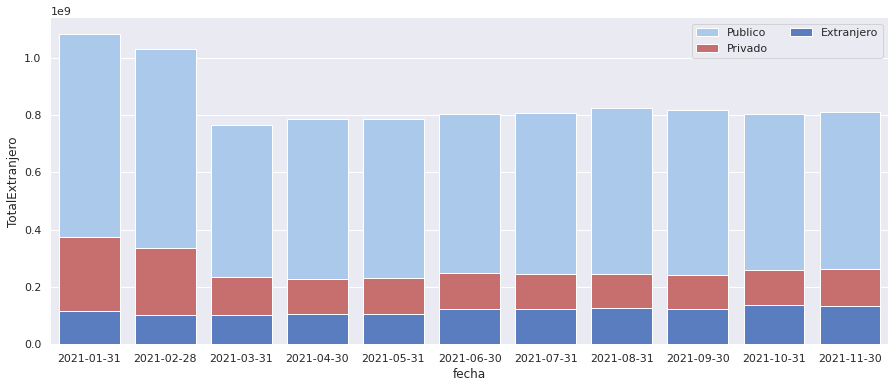

In [ ]:
codigoregimen = 5
result10 = df.groupby(["fecha","codigoregimen","regimen","sector"])["montodolares"].sum().reset_index(name="TotalPublico")
result10 = result10[result10.codigoregimen==codigoregimen]
result10 = result10.groupby(["fecha","regimen"])["TotalPublico"].sum().reset_index(name="TotalPublico")
#print(result10)
result11 = df.groupby(["fecha","codigoregimen","regimen","sector"])["montodolares"].sum().reset_index(name="TotalPrivado")
result11 = result11[((result11.sector == 'PRIVADO')|(result11.sector == 'EXTRANJERO')  ) & (result11.codigoregimen==codigoregimen)]
result11 = result11.groupby(["fecha","regimen"])["TotalPrivado"].sum().reset_index(name="TotalPrivado")
#print(result11)
result12 = df.groupby(["fecha","codigoregimen","regimen","sector"])["montodolares"].sum().reset_index(name="TotalExtranjero")
result12 = result12[(result12.sector == 'EXTRANJERO') & (result12.codigoregimen==codigoregimen)]
result12 = result12.groupby(["fecha","regimen"])["TotalExtranjero"].sum().reset_index(name="TotalExtranjero")
#print(result12)
result13A = pd.merge(result11,result12,left_on='fecha', right_on='fecha', how='outer')
result13 = pd.merge(result10,result13A,left_on='fecha', right_on='fecha', how='outer')
result13.sort_values(by=['fecha'], inplace=True)
#print(result13)
f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(y = 'TotalPublico', x = 'fecha', data = result13, estimator=sum, label = 'Publico', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalPrivado', x = 'fecha', data = result13, estimator=sum, label = 'Privado', color = 'r', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalExtranjero', x = 'fecha', data = result13, estimator=sum, label = 'Extranjero', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.show()

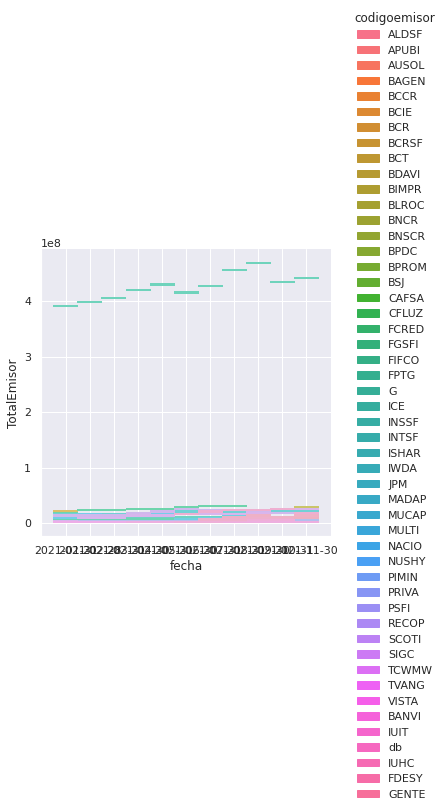

In [56]:
codigoregimen = 1
result10 = df.groupby(["fecha","codigoregimen","regimen","codigoemisor"])["montodolares"].sum().reset_index(name="TotalEmisor")
result10 = result10[result10.codigoregimen==codigoregimen]
#f, ax = plt.subplots(figsize = (15,6))
sns.displot(data=result10, x='fecha', y="TotalEmisor", hue='codigoemisor')
#plt.show

